In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import os

pd.set_option('display.max_rows', 500)

## Feather format

In [9]:
train_df = pd.read_csv('Data/train.csv')
weather_train_df = pd.read_csv('Data/weather_train.csv')
test_df = pd.read_csv('Data/test.csv')
weather_test_df = pd.read_csv('Data/weather_test.csv')
building_meta_df = pd.read_csv('Data/building_metadata.csv')
# sample_submission = pd.read_csv(os.path.join(root, 'sample_submission.csv'))

train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])
weather_train_df['timestamp'] = pd.to_datetime(weather_train_df['timestamp'])
weather_test_df['timestamp'] = pd.to_datetime(weather_test_df['timestamp'])

cols = ['air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed']
for col in cols:
    weather_test_df[col+'_lag'] = weather_test_df[col].shift(1)
    weather_test_df[col+'_lag'] = weather_test_df[col].shift(1)

train_df.to_feather('Data/train.feather')
test_df.to_feather('Data/test.feather')
weather_train_df.to_feather('Data/weather_train.feather')
weather_test_df.to_feather('Data/weather_test.feather')
building_meta_df.to_feather('Data/building_metadata.feather')
# sample_submission.to_feather('sample_submission.feather')

In [45]:
train_df = pd.read_feather('Data/train.feather')
weather_train_df = pd.read_feather('Data/weather_train.feather')
test_df = pd.read_feather('Data/test.feather')
weather_test_df = pd.read_feather('Data/weather_test.feather')
building_meta_df = pd.read_feather('Data/building_metadata.feather')

## Previous Code

In [84]:
# %%time
# building = pd.read_csv('data/building_metadata.csv')
# train = pd.read_csv('data/train.csv')
# weather = pd.read_csv('data/weather_train.csv')

Wall time: 7.54 s


In [76]:
train.shape

(20216100, 4)

In [83]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


## Building

In [75]:
building.shape

(1449, 6)

In [14]:
building.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [20]:
building['site_id'].value_counts().sort_index()

0     105
1      51
2     135
3     274
4      91
5      89
6      44
7      15
8      70
9     124
10     30
11      5
12     36
13    154
14    102
15    124
Name: site_id, dtype: int64

## Weather

In [15]:
weather.shape

(139773, 9)

In [82]:
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [18]:
weather['site_id'].value_counts().sort_index()

0     8784
1     8763
2     8783
3     8780
4     8783
5     8755
6     8782
7     8614
8     8784
9     8780
10    8782
11    8614
12    8755
13    8783
14    8777
15    8454
Name: site_id, dtype: int64

## Prepare data

In [46]:
train_df = train_df.merge(building_meta_df, left_on = "building_id", right_on = "building_id", how = "left")
train_df = train_df.merge(weather_train_df, left_on = ["site_id", "timestamp"], right_on = ["site_id", "timestamp"], how = "left")

In [47]:
train_df.shape

(20216100, 16)

In [48]:
train_df.to_feather('Data/train_joined.feather')

In [39]:
# ## Function to reduce the DF size
# def reduce_mem_usage(df, verbose=True):
#     numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#     start_mem = df.memory_usage().sum() / 1024**2    
#     for col in df.columns:
#         col_type = df[col].dtypes
#         if col_type in numerics:
#             c_min = df[col].min()
#             c_max = df[col].max()
#             if str(col_type)[:3] == 'int':
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     df[col] = df[col].astype(np.int8)
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
#                     df[col] = df[col].astype(np.int16)
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
#                     df[col] = df[col].astype(np.int32)
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
#                     df[col] = df[col].astype(np.int64)  
#             else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
#                     df[col] = df[col].astype(np.float32)
#                 else:
#                     df[col] = df[col].astype(np.float64)    
#     end_mem = df.memory_usage().sum() / 1024**2
#     if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
#     return df


In [41]:
# train_df = reduce_mem_usage(train_df)

Mem. usage decreased to 1041.10 Mb (60.3% reduction)


In [33]:
# train.to_csv('train_joined.csv')

# <font color='red'> Start from here </font>

In [68]:
%%time
train = pd.read_csv('train_joined.csv', parse_dates=['timestamp'])

Wall time: 34.3 s


#### Timestamp

In [3]:
train['timestamp'].max()

Timestamp('2016-12-31 23:00:00')

In [4]:
train['timestamp'].min()

Timestamp('2016-01-01 00:00:00')

#### Sanity check: look at meter 0 of building 0

In [36]:
tmp = train[ (train['building_id'] == 0) & (train['meter']==0)]

In [37]:
tmp.tail(10)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
20102017,0,0,2016-12-31 14:00:00,197.259995,0,Education,7432,2008.0,NaN,11.101562,2.0,1.700195,0.0,1025.0,360.0,2.599609
20104381,0,0,2016-12-31 15:00:00,188.386993,0,Education,7432,2008.0,NaN,15.000000,2.0,3.900391,0.0,1025.0,350.0,2.099609
20106746,0,0,2016-12-31 16:00:00,201.354996,0,Education,7432,2008.0,NaN,17.796875,2.0,6.699219,0.0,1025.0,0.0,0.000000
20109110,0,0,2016-12-31 17:00:00,176.783005,0,Education,7432,2008.0,NaN,20.000000,2.0,9.398438,0.0,1024.0,120.0,3.599609
20111416,0,0,2016-12-31 18:00:00,215.005997,0,Education,7432,2008.0,NaN,21.703125,4.0,10.601562,0.0,1022.5,180.0,5.101562
20113779,0,0,2016-12-31 19:00:00,232.070999,0,Education,7432,2008.0,NaN,22.796875,NaN,10.000000,0.0,1021.5,140.0,5.699219
20116142,0,0,2016-12-31 20:00:00,189.069000,0,Education,7432,2008.0,NaN,23.296875,NaN,8.898438,0.0,1021.0,170.0,4.101562
20118508,0,0,2016-12-31 21:00:00,169.957993,0,Education,7432,2008.0,NaN,23.296875,NaN,10.000000,0.0,1021.0,150.0,4.101562
20120873,0,0,2016-12-31 22:00:00,169.957993,0,Education,7432,2008.0,NaN,22.796875,NaN,10.000000,0.0,1021.0,160.0,3.099609
20123239,0,0,2016-12-31 23:00:00,175.417999,0,Education,7432,2008.0,NaN,20.593750,NaN,10.000000,0.0,1021.0,0.0,0.000000


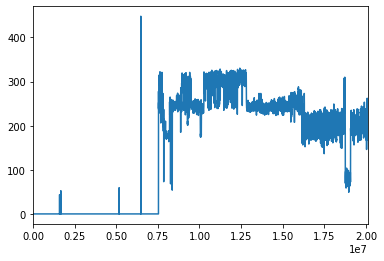

In [27]:
tmp['meter_reading'].plot()

## Why there are a lot of zeros in first half of data?
check this link: https://www.kaggle.com/c/ashrae-energy-prediction/discussion/113054

We should remove first 5 months of data in sites 0

## Missing values

In [38]:
train.isnull().sum()/train.shape[0]

building_id           0.000000
meter                 0.000000
timestamp             0.000000
meter_reading         0.000000
site_id               0.000000
primary_use           0.000000
square_feet           0.000000
year_built            0.601885
floor_count           0.826313
air_temperature       0.000306
cloud_coverage        0.434018
dew_temperature       0.000479
precip_depth_1_hr     0.181785
sea_level_pressure    0.056703
wind_direction        0.067504
wind_speed            0.002642
dtype: float64

#### Summary on missing values
1. Remove: floor_count(since wehave square_feet), year_built, precip_depth_1_hr
2. fill with previous value: temp, pressure, wind, cloud_coverage

#### Check year_built
I will remove it because there's no way to do a proper imputation.

In [42]:
building.groupby(by=['site_id'])['year_built'].agg(np.nanmean)

site_id
0     1995.542857
1     1961.475000
2     1974.882979
3     1961.727273
4     1954.123596
5     1962.602273
6             NaN
7     1958.500000
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15    1962.371681
Name: year_built, dtype: float64

In [44]:
building[building['site_id']==8]

,site_id,building_id,primary_use,square_feet,year_built,floor_count
804,8,804,Office,175618,NaN,1.0
805,8,805,Entertainment/public assembly,3200,NaN,1.0
806,8,806,Other,28693,NaN,2.0
807,8,807,Entertainment/public assembly,3000,NaN,1.0
808,8,808,Other,9357,NaN,1.0
809,8,809,Entertainment/public assembly,520,NaN,1.0
810,8,810,Entertainment/public assembly,3729,NaN,1.0
811,8,811,Public services,4848,NaN,1.0
812,8,812,Entertainment/public assembly,9894,NaN,1.0
813,8,813,Public services,5630,NaN,1.0


#### Check cloud_coverage and precip
conclusion: maybe fill with previouse value

In [47]:
weather2 = pd.read_csv('data/weather_train.csv', parse_dates=['timestamp'])

In [48]:
weather2.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [54]:
weather2['hour'] = weather2['timestamp'].map(lambda x: x.hour)

In [55]:
def nan_ratio(se):
    return(np.sum(se.isnull())/len(se))
    
weather2.groupby(by=['hour'])['cloud_coverage'].agg(nan_ratio)

hour
0     0.342597
1     0.510572
2     0.499743
3     0.463507
4     0.496819
5     0.498451
6     0.357364
7     0.515068
8     0.519340
9     0.485915
10    0.530483
11    0.533517
12    0.399145
13    0.542602
14    0.542803
15    0.504634
16    0.547971
17    0.549458
18    0.382071
19    0.550292
20    0.545923
21    0.501971
22    0.532214
23    0.525485
Name: cloud_coverage, dtype: float64

In [86]:
weather2.groupby(by=['site_id']).agg(nan_ratio)

,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour
site_id,,,,,,,,,
0,0.0,0.000342,0.436020,0.000342,0.000114,0.009677,0.028461,0.000000,0
1,0.0,0.000114,0.805888,0.000114,1.000000,0.005934,0.000342,0.000000,0
2,0.0,0.000114,0.268018,0.000114,0.007515,0.005010,0.067289,0.000569,0
3,0.0,0.000456,0.414806,0.000683,0.004214,0.017995,0.017426,0.000456,0
4,0.0,0.000000,0.481612,0.000228,0.149949,0.008312,0.011955,0.000000,0
5,0.0,0.000228,0.688749,0.000228,1.000000,1.000000,0.033695,0.000343,0
6,0.0,0.001139,0.340697,0.001139,0.000000,0.019927,0.088704,0.004441,0
7,0.0,0.000000,1.000000,0.002670,0.915138,0.000929,0.000000,0.000000,0
8,0.0,0.000342,0.436020,0.000342,0.000114,0.009677,0.028461,0.000000,0


## Remove year, floor and precip_depth_1_hr. 

## <font color='red'> I take out cloud_coverage, precip_depth_1_hr, wind_direction, and  sea_level_pressure for now </font>

In [69]:
train = train.drop(['year_built', 'floor_count', 'Unnamed: 0', 
                    'precip_depth_1_hr', 'cloud_coverage', 'sea_level_pressure', 'wind_direction'], axis=1)

In [14]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,wind_speed
0,0,0,2016-01-01,0.0,0,Education,7432,25.0,20.0,0.0
1,1,0,2016-01-01,0.0,0,Education,2720,25.0,20.0,0.0
2,2,0,2016-01-01,0.0,0,Education,5376,25.0,20.0,0.0
3,3,0,2016-01-01,0.0,0,Education,23685,25.0,20.0,0.0
4,4,0,2016-01-01,0.0,0,Education,116607,25.0,20.0,0.0


In [15]:
# then drop some na values
train = train.dropna()

In [11]:
# train = train.fillna(method = 'ffill')

In [16]:
train.isnull().sum()/train.shape[0]

building_id        0.0
meter              0.0
timestamp          0.0
meter_reading      0.0
site_id            0.0
primary_use        0.0
square_feet        0.0
air_temperature    0.0
dew_temperature    0.0
wind_speed         0.0
dtype: float64

In [17]:
train.shape

(20067705, 10)

## Run a LGB before remove site 0 

In [70]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,wind_speed
0,0,0,2016-01-01,0.0,0,Education,7432,25.0,20.0,0.0
1,1,0,2016-01-01,0.0,0,Education,2720,25.0,20.0,0.0
2,2,0,2016-01-01,0.0,0,Education,5376,25.0,20.0,0.0
3,3,0,2016-01-01,0.0,0,Education,23685,25.0,20.0,0.0
4,4,0,2016-01-01,0.0,0,Education,116607,25.0,20.0,0.0


In [71]:
train.shape

(20125605, 10)

In [73]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['primary_use'] = le.fit_transform(train['primary_use'])

In [74]:
# move y to the first column
move = ['meter_reading', 'timestamp'] + [x for x in train.columns if x not in ['meter_reading', 'timestamp']]
train = train[move]

In [75]:
train.head()

,meter_reading,timestamp,building_id,meter,site_id,primary_use,square_feet,air_temperature,dew_temperature,wind_speed
0,0.0,2016-01-01,0,0,0,0,7432,25.0,20.0,0.0
1,0.0,2016-01-01,1,0,0,0,2720,25.0,20.0,0.0
2,0.0,2016-01-01,2,0,0,0,5376,25.0,20.0,0.0
3,0.0,2016-01-01,3,0,0,0,23685,25.0,20.0,0.0
4,0.0,2016-01-01,4,0,0,0,116607,25.0,20.0,0.0


In [76]:
train.iloc[:,2:].head()

,building_id,meter,site_id,primary_use,square_feet,air_temperature,dew_temperature,wind_speed
0,0,0,0,0,7432,25.0,20.0,0.0
1,1,0,0,0,2720,25.0,20.0,0.0
2,2,0,0,0,5376,25.0,20.0,0.0
3,3,0,0,0,23685,25.0,20.0,0.0
4,4,0,0,0,116607,25.0,20.0,0.0


In [78]:
train.iloc[:,0].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: meter_reading, dtype: float64

In [32]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

In [81]:
%%time
X = train.iloc[:,2:]
y = train.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
# X_train_lgb, X_val_lgb, y_train_lgb, y_val_lgb = train_test_split(X_train, y_train, test_size=0.2, random_state=33)

bst = lgb.LGBMRegressor()
bst.fit(X_train.values, y_train.values)

# np.sqrt(mean_squared_log_error( y_test, predictions ))

prediction_on_X_train = bst.predict(X_train)
prediction_on_X_train = pd.Series(prediction_on_X_train)
prediction_on_X_train[prediction_on_X_train<0] = 0
print('train: ', np.sqrt(mean_squared_log_error( y_train, prediction_on_X_train)))

prediction_on_X_test = bst.predict(X_test)
prediction_on_X_test = pd.Series(prediction_on_X_test)
prediction_on_X_test[prediction_on_X_test<0] = 0
print('test: ', np.sqrt(mean_squared_log_error( y_test, prediction_on_X_test )))

train:  2.3130849364534343
test:  2.3123265447222705
Wall time: 47 s


In [59]:
# prediction_on_X_train = pd.Series(prediction_on_X_train)
# prediction_on_X_train[prediction_on_X_train<0] = 0

In [61]:
np.sum(prediction_on_X_train<0)/len(prediction_on_X_train)

0.0

## Remove first 5 months in sites 0

In [83]:
mask =(train['site_id']==0) & (train['timestamp'] < '2016-06-01')
train = train[~mask]

In [84]:
%%time
X = train.iloc[:,2:]
y = train.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
# X_train_lgb, X_val_lgb, y_train_lgb, y_val_lgb = train_test_split(X_train, y_train, test_size=0.2, random_state=33)

bst = lgb.LGBMRegressor()

bst.fit(X_train.values, y_train.values)

# np.sqrt(mean_squared_log_error( y_test, predictions ))

prediction_on_X_train = bst.predict(X_train)
prediction_on_X_train = pd.Series(prediction_on_X_train)
prediction_on_X_train[prediction_on_X_train<0] = 0
print('train: ', np.sqrt(mean_squared_log_error( y_train, prediction_on_X_train)))

prediction_on_X_test = bst.predict(X_test)
prediction_on_X_test = pd.Series(prediction_on_X_test)
prediction_on_X_test[prediction_on_X_test<0] = 0
print('test: ', np.sqrt(mean_squared_log_error( y_test, prediction_on_X_test )))

train:  2.234206814693851
test:  2.2326535223199695
Wall time: 51.6 s


## Add month, week day, day, hour

In [90]:
%%time
train['date_month'] = train['timestamp'].map(lambda x: x.month)
train['date_day'] = train['timestamp'].map(lambda x: x.day)
train['iso_week'] = train['timestamp'].map(lambda x: x.isocalendar()[1])
train['iso_weekend'] = train['timestamp'].map(lambda x: x.isocalendar()[2])
train['hour'] = train['timestamp'].map(lambda x: x.hour)

TypeError: 'builtin_function_or_method' object is not subscriptable

In [95]:
train.head()

,meter_reading,timestamp,building_id,meter,site_id,primary_use,square_feet,air_temperature,dew_temperature,wind_speed,date_month,date_day,iso_week,iso_weekend,hour
103,23.3036,2016-01-01,105,0,1,0,50623,3.8,2.4,3.1,1,1,53,5,0
104,0.3746,2016-01-01,106,0,1,0,5374,3.8,2.4,3.1,1,1,53,5,0
105,0.0000,2016-01-01,106,3,1,0,5374,3.8,2.4,3.1,1,1,53,5,0
106,175.1840,2016-01-01,107,0,1,0,97532,3.8,2.4,3.1,1,1,53,5,0
107,91.2653,2016-01-01,108,0,1,0,81580,3.8,2.4,3.1,1,1,53,5,0


In [100]:
%%time
X = train.iloc[:,2:]
y = train.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
# X_train_lgb, X_val_lgb, y_train_lgb, y_val_lgb = train_test_split(X_train, y_train, test_size=0.2, random_state=33)

Wall time: 11.5 s


In [101]:
bst = lgb.LGBMRegressor(n_estimators=500)

In [102]:
bst.fit(X_train.values, y_train.values)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [103]:
prediction_on_X_train = bst.predict(X_train)
prediction_on_X_train = pd.Series(prediction_on_X_train)
prediction_on_X_train[prediction_on_X_train<0] = 0
print('train: ', np.sqrt(mean_squared_log_error( y_train, prediction_on_X_train)))

prediction_on_X_test = bst.predict(X_test)
prediction_on_X_test = pd.Series(prediction_on_X_test)
prediction_on_X_test[prediction_on_X_test<0] = 0
print('test: ', np.sqrt(mean_squared_log_error( y_test, prediction_on_X_test )))

train:  1.9620416238057665
test:  1.9607505086079655


## Deal with outliers in y

In [125]:
std = train['meter_reading'].std()
np.sum(train['meter_reading'] > 0.1*std)/len(train['meter_reading'])

0.0027543692489343696

#### Because standard deviation is not helpful in terms of filtering outliers, I decided to take off those > 10000

In [144]:
check = train['meter_reading'].sort_values(ascending=False)

In [146]:
check2 = train[check>10000]
check2.head()

C:\Users\spong\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,meter_reading,timestamp,building_id,meter,site_id,primary_use,square_feet,air_temperature,dew_temperature,wind_speed,date_month,date_day,iso_week,iso_weekend,hour
916,17468.8,2016-01-01,1088,2,13,0,287594,-8.3,-12.2,4.1,1,1,53,5,0
943,3241630.0,2016-01-01,1099,2,13,0,332884,-8.3,-12.2,4.1,1,1,53,5,0
953,17601.6,2016-01-01,1104,2,13,9,199722,-8.3,-12.2,4.1,1,1,53,5,0
960,20039.1,2016-01-01,1107,2,13,0,184098,-8.3,-12.2,4.1,1,1,53,5,0
1033,55125.0,2016-01-01,1148,2,13,6,861524,-8.3,-12.2,4.1,1,1,53,5,0


In [148]:
check2.groupby(['site_id'])['meter_reading'].count()/check2.shape[0]

site_id
0     0.031786
1     0.000042
6     0.008908
7     0.005083
9     0.002018
10    0.033804
13    0.740059
14    0.165207
15    0.013093
Name: meter_reading, dtype: float64

In [149]:
check3 = check2[check2['site_id']==13]
check3.groupby(['building_id'])['meter_reading'].count()/check3.shape[0]

building_id
1072    0.010409
1086    0.001628
1088    0.066696
1091    0.004341
1092    0.000057
1099    0.054416
1100    0.002984
1104    0.052103
1107    0.046063
1108    0.000585
1117    0.000057
1140    0.014150
1148    0.118814
1152    0.002599
1154    0.037210
1156    0.067938
1158    0.035126
1159    0.125253
1168    0.124582
1169    0.001328
1178    0.010880
1180    0.000757
1191    0.000243
1197    0.115073
1200    0.004726
1203    0.000157
1206    0.000086
1209    0.000114
1214    0.076234
1218    0.000100
1220    0.025288
Name: meter_reading, dtype: float64

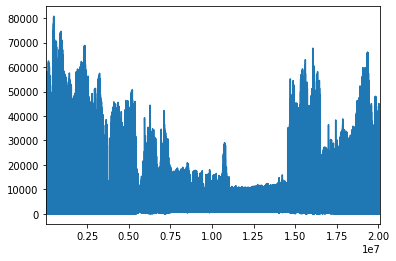

In [150]:
train[train['building_id']==1148]['meter_reading'].plot()

In [151]:
def max_to_mean_ratio(se):
    return(np.max(se)/np.mean(se))
check_max_to_mean = train.groupby(by = ['building_id'])['meter_reading'].agg(max_to_mean_ratio)

## This is very intersting, I assume the higher max_to_mean_ratio is, the more outliers there are. But for now this is more difficult way to deal with, so I will try transformation on y first.

In [153]:
check_max_to_mean.sort_values(ascending = False)

building_id
954     374.001427
876     353.391404
776     188.087020
145     182.156816
948     153.679099
993     148.868586
961     144.298650
900     134.961342
973     129.831821
908     129.175877
233     118.860167
934     106.736349
926     106.440396
956     106.218969
879     104.504147
891     103.951455
857      95.001771
1256     86.924259
1017     86.738278
755      81.421238
990      79.554232
963      74.390301
910      65.863864
766      65.631898
904      65.117209
119      63.306902
1231     61.813358
745      61.455588
1311     61.173349
920      58.313710
1000     57.171209
976      56.451803
1015     55.342920
1305     55.175413
925      52.071725
969      51.669017
1255     50.859664
1268     50.740072
931      49.575785
888      49.016725
880      48.820118
187      47.452772
978      46.967474
907      46.835789
989      46.688749
957      45.640173
885      45.593397
967      45.558242
1088     45.139245
996      44.977901
906      43.652624
983      43.171680


## Try transformation on y

In [117]:
tmp2 = train['meter_reading'].map(lambda x: np.log(x+1))

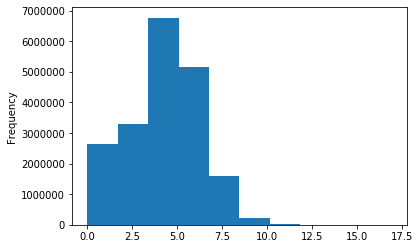

In [122]:
tmp2.plot.hist()

In [123]:
tmp2.describe()

count    1.969961e+07
mean     4.211035e+00
std      2.090040e+00
min      0.000000e+00
25%      3.049747e+00
50%      4.412435e+00
75%      5.611302e+00
max      1.690221e+01
Name: meter_reading, dtype: float64

In [154]:
train['meter_reading'][:10]

103     23.3036
104      0.3746
105      0.0000
106    175.1840
107     91.2653
108     80.9300
109      0.0000
110     86.2283
111    167.3920
112     10.2748
Name: meter_reading, dtype: float64

In [158]:
tmp2[:10].map(lambda x: np.exp(x) - 1)

103     23.3036
104      0.3746
105      0.0000
106    175.1840
107     91.2653
108     80.9300
109      0.0000
110     86.2283
111    167.3920
112     10.2748
Name: meter_reading, dtype: float64

In [159]:
%%time
X = train.iloc[:,2:]
y = train.iloc[:,0].map(lambda x: np.log(x+1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
# X_train_lgb, X_val_lgb, y_train_lgb, y_val_lgb = train_test_split(X_train, y_train, test_size=0.2, random_state=33)

Wall time: 28 s


In [165]:
%%time
bst = lgb.LGBMRegressor(n_estimators=500)

Wall time: 0 ns


In [166]:
%%time
bst.fit(X_train.values, y_train.values)

OSError: exception: access violation reading 0x00000000000002A8

In [ ]:
prediction_on_X_train = bst.predict(X_train)
prediction_on_X_train = pd.Series(prediction_on_X_train)
prediction_on_X_train[prediction_on_X_train<0] = 0
print('train: ', np.sqrt(mean_squared_log_error( y_train, prediction_on_X_train)))

prediction_on_X_test = bst.predict(X_test)
prediction_on_X_test = pd.Series(prediction_on_X_test)
prediction_on_X_test[prediction_on_X_test<0] = 0
print('test: ', np.sqrt(mean_squared_log_error( y_test, prediction_on_X_test )))